#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 4: K-Nearest Neighbors

K-Nearest Neighbors (K-NN) is among the simplest of all machine learning algorithms. K-NN is a supervised classification algorithm that classifies a data point based on a combination of the known classification of the k points that are closest to it. K-Nearest Neighbors does not attempt to fit a model to the data. Rather, the algorithm simply determines the "majority vote" (the class mode) of the k points that are nearest the point you are trying to classify.

####Algorithm steps:

Determine k.

Calculate the distance between the new observation and all points in the training set.

Sort the distances to determine the k nearest neighbors based on the k-th minimum distance.

Determine the class of those neighbors.

Determine the majority.

Note: yhat has a very good post on classification using K-NN in Python that's well-worth a read.

In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
iris = datasets.load_iris()

In [3]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n    

###K-NN Analysis

In [41]:
iris_df = pd.DataFrame()

In [52]:
iris_df['sepal_length'] = iris.data[:,0]
iris_df['sepal_width'] = iris.data[:,1]
iris_df['petal_length'] = iris.data[:,2]
iris_df['petal_width'] = iris.data[:,3]
iris_df['target'] = iris.target
iris_df['target_flower'] = iris.target
iris_df['target_flower'].replace(0, 'setosa', inplace = True)
iris_df['target_flower'].replace(1, 'versicolor', inplace = True)
iris_df['target_flower'].replace(2, 'virginica', inplace = True)

In [53]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,target_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


####Create a scatterplot of sepal length by width in the Iris dataset.

In [15]:
%matplotlib inline

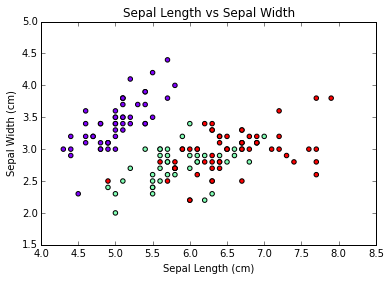

In [95]:
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.rainbow)
# plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.Set1, label = iris.target_names)
# plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

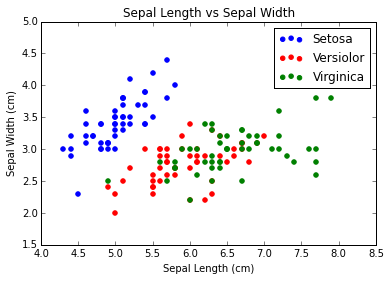

In [115]:
iris_df1 = iris_df[iris_df['target_flower']=='setosa']
iris_df2 = iris_df[iris_df['target_flower']=='versicolor']
iris_df3 = iris_df[iris_df['target_flower']=='virginica']
plt.scatter(iris_df1['sepal_length'], iris_df1['sepal_width'], label = 'Setosa', color='b')
plt.scatter(iris_df2['sepal_length'], iris_df2['sepal_width'], label = 'Versiolor', color='r')
plt.scatter(iris_df3['sepal_length'], iris_df3['sepal_width'], label = 'Virginica', color='g')
plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

####Pick a new point, programmatically at random.

In [132]:
test_y = np.random.uniform(min(sepal_width), max(sepal_width))
test_x = np.random.uniform(min(sepal_length), max(sepal_length))

In [133]:
test_y

2.7645599698683703

In [134]:
test_x

6.031175522438984

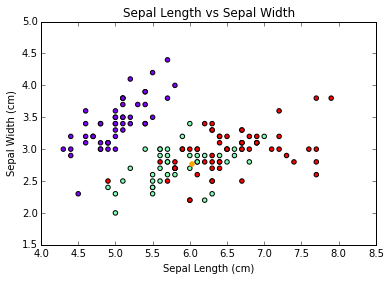

In [135]:
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.rainbow)
plt.scatter(test_x, test_y, color='orange')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [131]:
len(iris_df['sepal_length'])

150

In [117]:
len(iris_df['sepal_width'])

150

####Analysis
Sort each point by its distance from the new point, and subset the 10 nearest points. Determine the majority class of the subset.
See if you can write a function called knn() that will take k as an argument and return the majority class for different values of k.

In [100]:
from math import sqrt

In [102]:

# iris_df['distance from point'] = sqrt((pow(iris_df['sepal_length'] - test_x,2)) + (pow(iris_df['sepal_width'] - test_y,2)))
        

TypeError: cannot convert the series to <class 'float'>

####Find distance between new point and other points

In [148]:

dist = [sqrt((pow(sl-test_x,2))+pow(sw-test_y,2)) for sl, sw in zip(iris_df['sepal_length'].tolist(), iris_df['sepal_width'].tolist())]


Look up zip*

In [137]:
li

[0.9604789749796181,
 1.1554177038428526,
 1.3518358921589129,
 1.4504121427431866,
 1.0577121375240495,
 0.6736575895174836,
 1.4504121427431866,
 1.0577121375240495,
 1.6480793648342524,
 1.1554177038428526,
 0.6736575895174836,
 1.2534852112575114,
 1.2534852112575114,
 1.7471121020931288,
 0.32996080064656147,
 0.40633635629994574,
 0.6736575895174836,
 0.9604789749796181,
 0.40633635629994574,
 0.9604789749796181,
 0.6736575895174836,
 0.9604789749796181,
 1.4504121427431866,
 0.9604789749796181,
 1.2534852112575114,
 1.0577121375240495,
 1.0577121375240495,
 0.8638777441803326,
 0.8638777441803326,
 1.3518358921589129,
 1.2534852112575114,
 0.6736575895174836,
 0.8638777441803326,
 0.581015871923229,
 1.1554177038428526,
 1.0577121375240495,
 0.581015871923229,
 1.1554177038428526,
 1.6480793648342524,
 0.9604789749796181,
 1.0577121375240495,
 1.5491709035173225,
 1.6480793648342524,
 1.0577121375240495,
 0.9604789749796181,
 1.2534852112575114,
 0.9604789749796181,
 1.450412142

In [123]:
len(li)

150

In [150]:
iris_df['distance'] = dist

In [146]:
sqrt((pow(5.0999999999999996-test_x,2))+pow(3.5-test_y,2))

1.1865748571032202

In [144]:
iris_df['sepal_length'][0]

5.0999999999999996

In [145]:
iris_df['sepal_width'][0]

3.5

In [142]:
test_x

6.031175522438984

In [143]:
test_y

2.7645599698683703

In [151]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,target_flower,distance
0,5.1,3.5,1.4,0.2,0,setosa,1.186575
1,4.9,3.0,1.4,0.2,0,setosa,1.155418
2,4.7,3.2,1.3,0.2,0,setosa,1.400584
3,4.6,3.1,1.5,0.2,0,setosa,1.469960
4,5.0,3.6,1.4,0.2,0,setosa,1.327133
5,5.4,3.9,1.7,0.4,0,setosa,1.299079
6,4.6,3.4,1.4,0.3,0,setosa,1.565901
7,5.0,3.4,1.5,0.2,0,setosa,1.211242
8,4.4,2.9,1.4,0.2,0,setosa,1.636789
9,4.9,3.1,1.5,0.1,0,setosa,1.179864


####Sort each point by its distance from the new point

In [165]:
iris_df = iris_df.sort('distance')

####Subset the 10 nearest points

In [166]:
iris_df = iris_df.reset_index(drop=True)

In [167]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,target_flower,distance
0,6.0,2.7,5.1,1.6,1,versicolor,0.071693
1,6.1,2.8,4.0,1.3,1,versicolor,0.077413
2,6.1,2.8,4.7,1.2,1,versicolor,0.077413
3,6.0,2.9,4.5,1.5,1,versicolor,0.138982
4,6.1,2.9,4.7,1.4,1,versicolor,0.151924
5,6.2,2.8,4.8,1.8,2,virginica,0.172504
6,6.1,2.6,5.6,1.4,2,virginica,0.178373
7,6.2,2.9,4.3,1.3,1,versicolor,0.216439
8,5.8,2.8,5.1,2.4,2,virginica,0.233876
9,6.0,3.0,4.8,1.8,2,virginica,0.237495


In [173]:
top_ten = iris_df[:10]

####Determine the majority class of the subset

Versicolor

In [170]:
from collections import Counter

In [178]:
count = Counter(top_ten['target_flower'].tolist())

In [183]:
count.most_common()[0][0]

'versicolor'

####See if you can write a function called knn() that will take k as an argument and return the majority class for different values of k

In [ ]:
count = counter(x)
count.most_common()

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
neigh = KNeighborsClassifier()
neigh.fit(iris_df['sepal_length'], iris_df['sepal_width'])
print(neigh.predict(test_x))

# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# >>>
# >>> X = [[0], [1], [2], [3]]
# >>> y = [0, 0, 1, 1]
# >>> from sklearn.neighbors import KNeighborsClassifier
# >>> neigh = KNeighborsClassifier(n_neighbors=3)
# >>> neigh.fit(X, y) 
# KNeighborsClassifier(...)
# >>> print(neigh.predict([[1.1]]))
# [0]
# >>> print(neigh.predict_proba([[0.9]]))
# [[ 0.66666667  0.33333333]]

ValueError: Found arrays with inconsistent numbers of samples: [  1 150]